We want to compare two different schemes of increasing reliability of a system using redundancy. Suppose that the system needs s identical components in series for proper operation. Further suppose that we are given (m x s) components.  Given that the reliability of an individual component is R, derive the expressions for the reliabilities of two configurations. For **m = 2** and **s =4**, compare the two expressions as function of a mission time t.
Let MTTF of the component be 800 hours.
Out of the two schemes shown in the figure below, which one will provide a higher reliability? Modify the scheme that has lower reliability in order to reach the same reliability of the other given the above **MTTf (800 h)**.


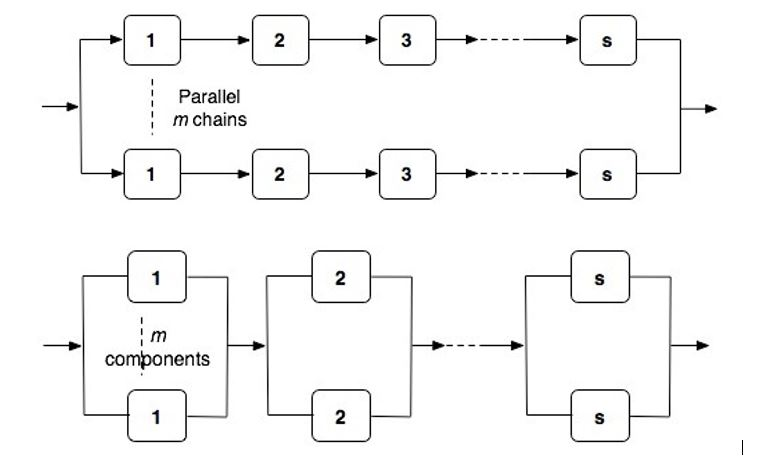

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
def PlotSystemTime(R1_t,R2_t):

      # Crea il layout del grafico
      fig = make_subplots(rows=1, cols=1)
      # Aggiungi la retta R1_t al grafico
      scatter_r1 = go.Scatter(x=t, y=R1_t, mode='lines', name='Parallelo di serie Syst1', line=dict(color='red'))
      fig.add_trace(scatter_r1)
      # Aggiungi la retta R2_t al grafico
      scatter_r2 = go.Scatter(x=t, y=R2_t, mode='lines', name='Serie di paralleli Syst2', line=dict(color='cyan'))
      fig.add_trace(scatter_r2)
      # Aggiungi la linea verticale per MTTF
      fig.add_shape(
          type='line',
          x0=MTTF,
          y0=0,
          x1=MTTF,
          y1=1,
          line=dict(color='black', dash='dash'),
          xref='x',
          yref='paper'
      )
      # Definisci le etichette degli assi
      fig.update_layout(xaxis_title='Tempo (h)', yaxis_title='Reliability sistema')
      # Aggiorna il layout per rendere il grafico interattivo
      fig.update_layout(hovermode='closest')
      # Visualizza il grafico
      fig.show()

In [3]:
def PlotSystemTime1(R1_t,R2_t):
      mission_time = MTTF
      #calcolo Rsy1(MTTF) in funzione del tempo

      Rsyst1 = np.exp(-lambda_val * mission_time)
      Rsyst2 = ((1 - (1 - Rsyst1)**m)**s)
      k = np.log(1 - Rsyst2) / np.log(1 - Rsyst1**s)

      R1_mod = (1 - (1 - r_t**s)**k)
      # Crea il layout del grafico
      fig = make_subplots(rows=1, cols=1)
      # Aggiungi la retta R1_mod al grafico
      scatter_r1_mod = go.Scatter(x=t, y=R1_mod, mode='lines', name='Parallelo di serie modificato Syst1', line=dict(color='red'))
      fig.add_trace(scatter_r1_mod)
      # Aggiungi la retta R2_t al grafico
      scatter_r2 = go.Scatter(x=t, y=R2_t, mode='lines', name='Serie di paralleli Syst2', line=dict(color='cyan'))
      fig.add_trace(scatter_r2)
      # Aggiungi la linea verticale per MTTF
      fig.add_shape(
          type='line',
          x0=MTTF,
          y0=0,
          x1=MTTF,
          y1=1,
          line=dict(color='black', dash='dash'),
          xref='x',
          yref='paper'
      )
      # Definisci le etichette degli assi
      fig.update_layout(xaxis_title='Tempo (h)', yaxis_title='Reliability sistema')
      # Aggiorna il layout per rendere il grafico interattivo
      fig.update_layout(hovermode='closest')
      # Visualizza il grafico
      fig.show()
      print(f"Quindi il Syst1 deve avere almeno {round(k,0)} catene parallele diverse per poter eguagliare la reliabiltiy al mission time t={MTTF} del Syst2")

Iniziamo a derivare le espressioni per la reliability delle due configurazioni. Nelprimo caso , abbiamo una catena di m paralleli di s componenti posti in serie,mentre nel secondo caso abbiamo s componenti in serie, dove ogni parallelo è costituito da m componenti singoli in parallelo; Quindi, nel primo caso, il primo sistema, che chiameremo sys1, avra la seguente equazione:

$ R_{\text{sys1}} = 1 - (1 - R^s)^m $

Il secondo sistema avrà invece la seguente equazione:

$ R_{\text{sys2}} = (1 - (1 - R)^m)^s $


Sostituendo m=2 e s=4 nelle due equazioni:


1.    $ R_{\text{sys1}} = 1 - (1 - R^4)^2 $
2.    $ R_{\text{sys2}} = (1 - (1 - R)^2)^4 $



In [4]:
# Programma principale
if __name__ == "__main__":
    #parametri sistema
    m=2
    s=4
    #ore
    MTTF=800
    TimeVal=1201
    t = np.arange(0, TimeVal, 1)
    lambda_val = 1/MTTF
    r_t = np.exp(-lambda_val * t)
    #calcolo R1 & R2 system
    R1_t = (1 - (1 - r_t**s)**m)
    R2_t = ((1 - (1 - r_t)**m)**s)

Andando quindi a graficare le due reliablity in funzione del tempo ( come
chiesto da traccia) otteniamo che la reliability migliore è quella del sistema numero 2. Il sistema numero 2 è quello azzurro, in rosso il sistema 1; inoltre,
stiamo supponendo una reliability di tipo esponenziale:


In [5]:
#1)Plotto le Realability dei due sistemi Rsyst1 e Rsyst2
PlotSystemTime(R1_t,R2_t)

La reliability del sistema 2 per un mission time pari a 800 ore è pari a:

$$
 R_{2mt}(800) = 0.12996
$$

Adesso risolviamo la seguente equazione per calcolare il valore m per il primo
sistema in modo che possa avere la stessa reliability del secondo:

$$
m= \frac{\log(1 - \ R_{syst2}(t))}{\log(1 - R_{syst2}(t)^4)} = 7.53
$$

Quindi il numero di paralleli m del primo
sistema per avere una reliability migliore (nel nostro caso, una reliability uguale al secondo sistema) `e m = 8.
Si può inoltre notare dal seguente grafico come per mission time inferiori a 800 ore sia più reliable il sistema 1 modificato, mentre per mission time superiori sia leggermente reliable il sistema s2 di partenza.




In [6]:
#2)Plotto le Realability dei due sistemi Rsyst1 e Rsyst2
PlotSystemTime1(R1_t,R2_t)

Quindi il Syst1 deve avere almeno 8.0 catene parallele diverse per poter eguagliare la reliabiltiy al mission time t=800 del Syst2
